In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data=pd.read_csv('cardio_train.csv',sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
data.shape

(69301, 13)

In [4]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.drop('id',axis=1,inplace=True)

data.drop_duplicates(inplace=True)

In [6]:
data.shape

(69277, 12)

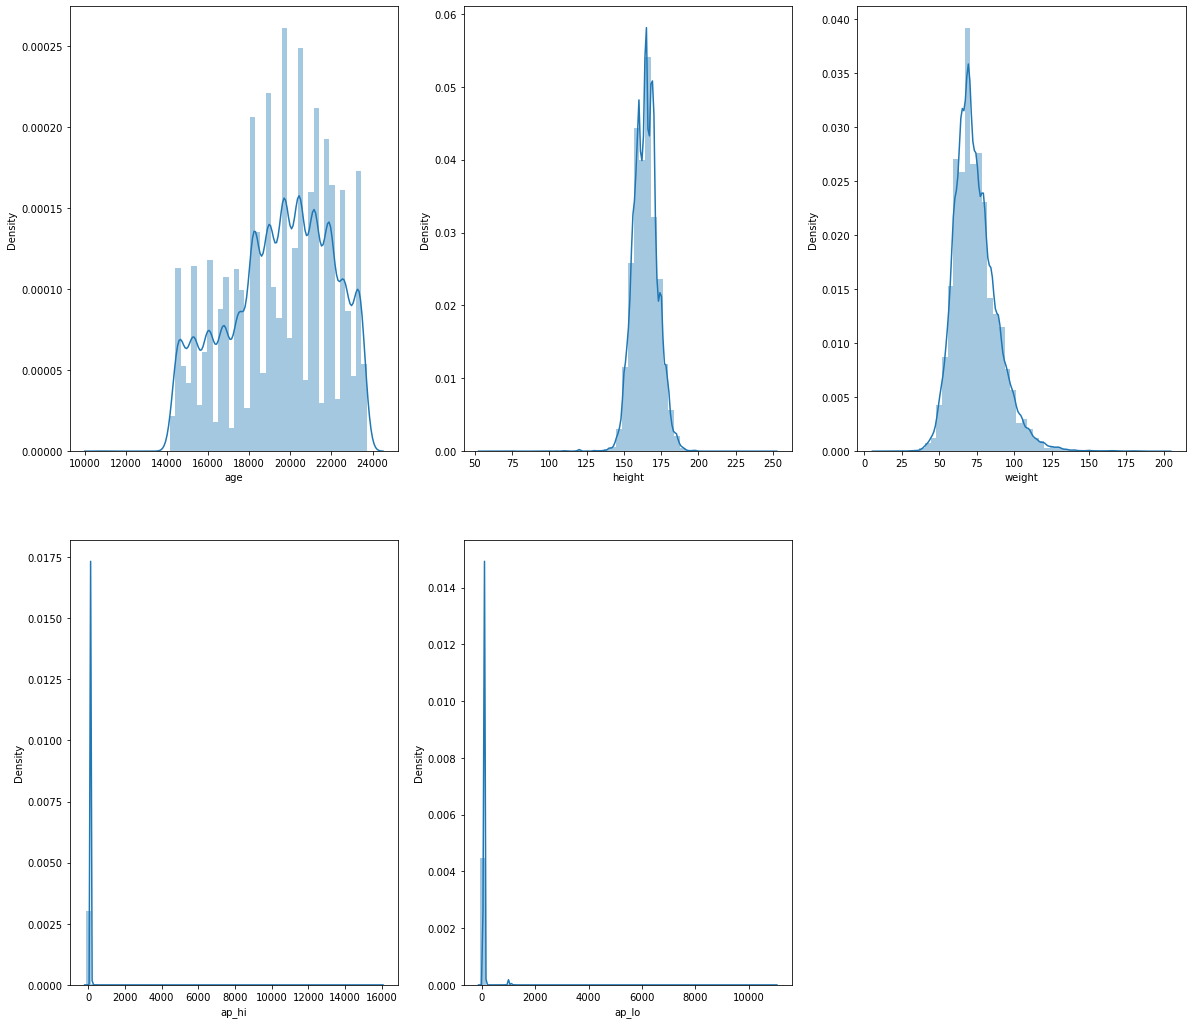

In [7]:
plt.figure(figsize=(20,18))
plotnumber=1

for column in data[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
        plotnumber+=1
plt.show()

In [8]:
from scipy.stats import zscore

In [9]:
z_score=zscore(data[['age','height','weight','ap_hi','ap_lo']])

abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

data.describe()



,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


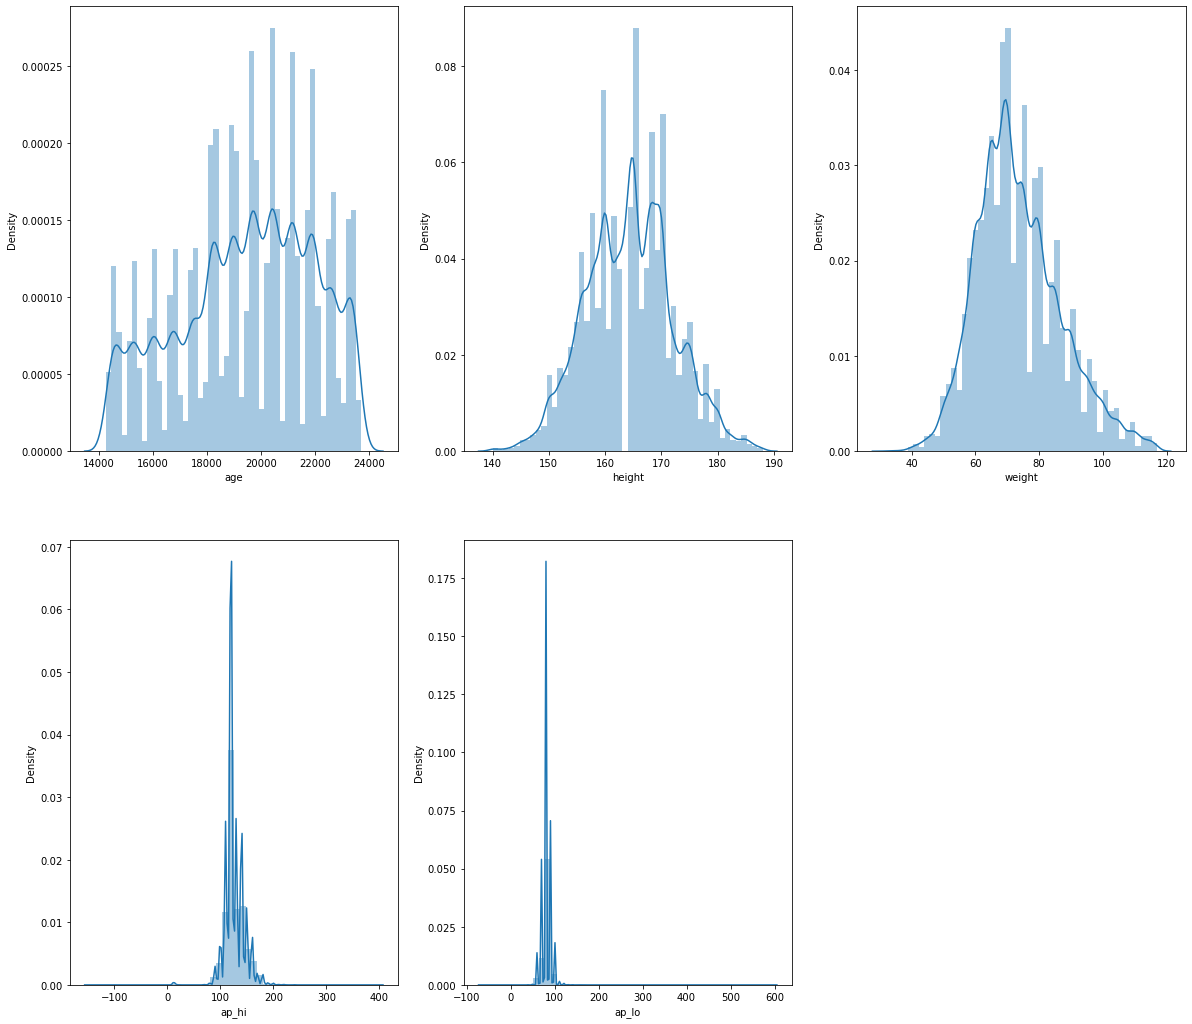

In [10]:
plt.figure(figsize=(20,18))
plotnumber=1

for column in data[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
        plotnumber+=1
plt.show()

In [11]:
data_corr=data.corr().abs()

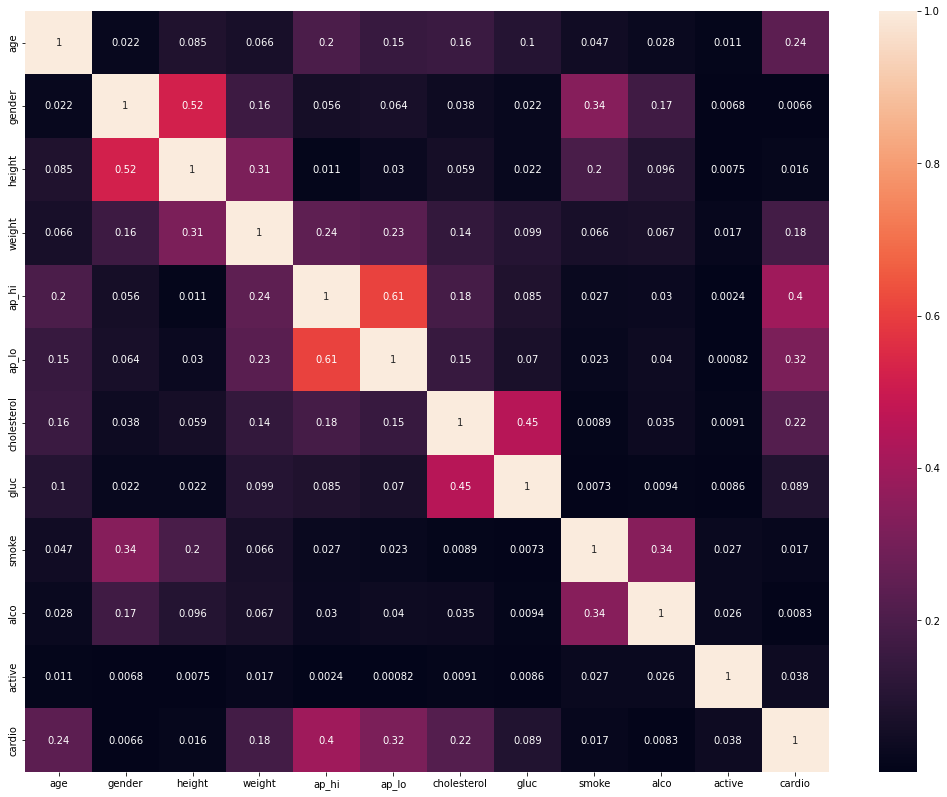

In [12]:
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True,annot_kws={'size':10})
plt.show()

In [13]:
x=data.drop(['cardio'],axis=1)
y=data['cardio']

In [14]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [15]:
x_scaled.shape[1]

11

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif=pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features']=x.columns

vif

,vif,features
0,1.071123,age
1,1.507506,gender
2,1.519844,height
3,1.221738,weight
4,1.658717,ap_hi
5,1.607891,ap_lo
6,1.317412,cholesterol
7,1.257853,gluc
8,1.248261,smoke
9,1.139820,alco


In [18]:
data.shape

(67360, 12)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=6999)

In [20]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("accuracy score of training score : ",accuracy_score(y_train,y_pred))
        
    elif train==False:
        pred=clf.predict(x_test)
        print('accuracy score of testing score : ',accuracy_score(y_test,pred))
        print('\n \n classification report \n \n : ',classification_report(y_test,pred))

In [21]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)

metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)

accuracy score of training score :  0.9997228820269201
accuracy score of testing score :  0.710332541567696

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.71      0.73      0.72      8606
           1       0.71      0.69      0.70      8234

    accuracy                           0.71     16840
   macro avg       0.71      0.71      0.71     16840
weighted avg       0.71      0.71      0.71     16840



In [23]:
param_grid={'n_estimators':[13,15],
            'criterion':['entropy','gini'],
           'max_depth':[10,15],
           'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }

In [24]:
gridsearch=GridSearchCV(estimator=random_clf,param_grid=param_grid)

In [25]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [26]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 11,
 'n_estimators': 15}

In [27]:
random_clf=gridsearch.best_estimator_
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=11,
                       n_estimators=15)

In [28]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)

metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)

accuracy score of training score :  0.7505146476642913
accuracy score of testing score :  0.726959619952494

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.71      0.79      0.75      8606
           1       0.75      0.66      0.70      8234

    accuracy                           0.73     16840
   macro avg       0.73      0.73      0.73     16840
weighted avg       0.73      0.73      0.73     16840



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [30]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
kn=KNeighborsClassifier()
random_clf=RandomForestClassifier()

In [31]:
x=data.drop(['cardio'],axis=1)
y=data['cardio']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=98)

In [33]:
scaled=StandardScaler()
x_scaled=scaled.fit(x_train,y_train)

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

accuracy score of training score :  0.7010095011876485
accuracy score of testing score :  0.6993467933491686

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.69      0.75      0.72      8585
           1       0.71      0.65      0.68      8255

    accuracy                           0.70     16840
   macro avg       0.70      0.70      0.70     16840
weighted avg       0.70      0.70      0.70     16840



In [36]:
param_grid={'penalty':['l1','l2'],
           'C':np.logspace(-4,4,50)}

In [37]:
gridsearch=GridSearchCV(estimator=lr,param_grid=param_grid)

In [38]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [39]:
gridsearch.best_params_

{'C': 0.009102981779915217, 'penalty': 'l2'}

In [40]:
lr=gridsearch.best_estimator_

In [41]:
lr.fit(x_train,y_train)

LogisticRegression(C=0.009102981779915217)

In [42]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

accuracy score of training score :  0.7009699129057799
accuracy score of testing score :  0.6993467933491686

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.69      0.75      0.72      8585
           1       0.71      0.65      0.68      8255

    accuracy                           0.70     16840
   macro avg       0.70      0.70      0.70     16840
weighted avg       0.70      0.70      0.70     16840



In [43]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

accuracy score of training score :  0.99986144101346
accuracy score of testing score :  0.6349762470308788

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.64      0.64      0.64      8585
           1       0.63      0.63      0.63      8255

    accuracy                           0.63     16840
   macro avg       0.63      0.63      0.63     16840
weighted avg       0.64      0.63      0.64     16840



In [45]:
params={'criterion':['gini','entropy'],
       'max_depth':range(10,15),
       'min_samples_leaf':range(2,10),
       'min_samples_split':range(3,10),
       'max_leaf_nodes':range(5,10)}

In [46]:
grd=GridSearchCV(estimator=dt,param_grid=params,cv=5,n_jobs=-1)

In [47]:
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [48]:
grd.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [49]:
dt=grd.best_estimator_

In [50]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=3)

In [51]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

accuracy score of training score :  0.7276326207442597
accuracy score of testing score :  0.7259501187648456

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.73      0.73      0.73      8585
           1       0.72      0.72      0.72      8255

    accuracy                           0.73     16840
   macro avg       0.73      0.73      0.73     16840
weighted avg       0.73      0.73      0.73     16840



In [52]:
kn=KNeighborsClassifier()

In [53]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
metric_score(kn,x_train,x_test,y_train,y_test,train=True)
metric_score(kn,x_train,x_test,y_train,y_test,train=False)

accuracy score of training score :  0.7774346793349168
accuracy score of testing score :  0.6834323040380047

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.68      0.70      0.69      8585
           1       0.68      0.66      0.67      8255

    accuracy                           0.68     16840
   macro avg       0.68      0.68      0.68     16840
weighted avg       0.68      0.68      0.68     16840



In [55]:
param={'algorithm':['kd_tree','brute'],
      'leaf_size':[3,5,6,7,8,9,10],
      'n_neighbors':[3,5,7,9,11,13]}

In [56]:
grd_search=GridSearchCV(estimator=kn,param_grid=param)

In [57]:
grd_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8, 9, 10],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [58]:
grd_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [59]:
kn=grd_search.best_estimator_

In [60]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [61]:
metric_score(kn,x_train,x_test,y_train,y_test,train=True)
metric_score(kn,x_train,x_test,y_train,y_test,train=False)

accuracy score of training score :  0.7411718131433096
accuracy score of testing score :  0.7034441805225653

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.69      0.75      0.72      8585
           1       0.71      0.66      0.69      8255

    accuracy                           0.70     16840
   macro avg       0.70      0.70      0.70     16840
weighted avg       0.70      0.70      0.70     16840



NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

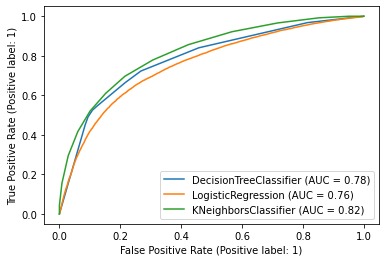

In [62]:
disp=plot_roc_curve(dt,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)

plot_roc_curve(kn,x_train,y_train,ax=disp.ax_)

plot_roc_curve(random_clf,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

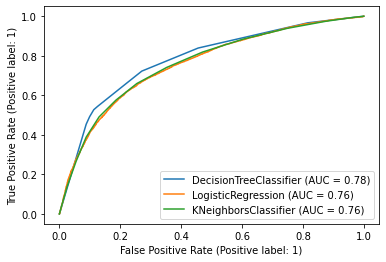

In [63]:
disp=plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)

plot_roc_curve(random_clf,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()